In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bangalore house price prediction OHE-data.csv')

In [3]:
df

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [4]:
X = df.drop('price', axis=1)
y = df['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


##Decision Tree Regression - ML Model Training

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [8]:
regressor.score(X_test, y_test)

0.8710380489327143

## Predict the value of Home

In [9]:
X_test.iloc[-1, :]

bath                               2.000000
balcony                            0.000000
total_sqft_int                  1566.000000
bhk                                2.000000
price_per_sqft                 11494.252874
                                   ...     
location_Hosur Road                0.000000
location_Horamavu Banaswadi        0.000000
location_Domlur                    0.000000
location_Mahadevpura               0.000000
location_Tumkur Road               0.000000
Name: 43, Length: 107, dtype: float64

In [10]:
regressor.predict([X_test.iloc[-1, :]])

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([171.])

In [11]:
y_test.iloc[-1]

180.0

In [12]:
pred = regressor.predict(X_test)
pred

array([ 83.  ,  39.95, 120.  , ...,  34.3 ,  62.  , 171.  ])

In [13]:
y_test

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64

[Text(0.7996984770676955, 0.9782608695652174, 'X[2] <= 2290.5\nmse = 11838.649\nsamples = 5696\nvalue = 95.08'),
 Text(0.6185130393690685, 0.9347826086956522, 'X[4] <= 6668.583\nmse = 1659.044\nsamples = 5175\nvalue = 74.427'),
 Text(0.4186891370356724, 0.8913043478260869, 'X[2] <= 1345.5\nmse = 542.184\nsamples = 4182\nvalue = 61.528'),
 Text(0.24261693103444992, 0.8478260869565217, 'X[4] <= 5143.528\nmse = 219.635\nsamples = 2980\nvalue = 51.082'),
 Text(0.10677830118171709, 0.8043478260869565, 'X[2] <= 882.5\nmse = 118.783\nsamples = 1948\nvalue = 44.083'),
 Text(0.027513100569722452, 0.7608695652173914, 'X[2] <= 654.0\nmse = 67.079\nsamples = 277\nvalue = 26.956'),
 Text(0.01116975901044999, 0.717391304347826, 'X[4] <= 3662.602\nmse = 34.08\nsamples = 120\nvalue = 19.989'),
 Text(0.00490509703561527, 0.6739130434782609, 'X[2] <= 453.0\nmse = 8.849\nsamples = 58\nvalue = 15.247'),
 Text(0.0019498522377601071, 0.6304347826086957, 'X[4] <= 3166.667\nmse = 3.296\nsamples = 20\nvalue = 

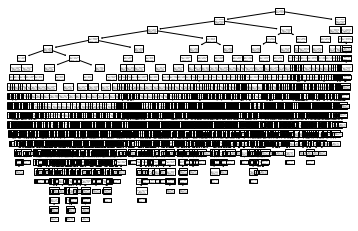

In [14]:
from sklearn.tree import plot_tree
plot_tree(regressor)